# Preparing .wav Files for Feature Extraction
 This notebook uses recordings that were put together from various sources (see README), but not the recordings used for our actual project.
 The recordings for the actual project came from the Macualay Museum of Natural Sounds and we have not obtained permission to share them.

## Required Packages

In [9]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import math
import soundfile as sf

## Remove MLNS catalog number from each file and keep only 20 seconds
Each of our recordings included a spoken catalog number at the beginning that needed to be removed. 
Further, some of our recordings were extremely long. To facilitate local processing, we kept only 20 seconds of audio.

In [72]:
def remove_Talking(file, db_cutoff = 60, max_length = 20):
    chirp_song, sr = librosa.load(file)
    split=librosa.effects.split(chirp_song, top_db=db_cutoff)
    chirp_song_split=chirp_song[split[-1,0]:split[-1,1]]
    if chirp_song_split.shape[0] > max_length * sr:
        chirp_song_split = chirp_song_split[:max_length * sr]
    return chirp_song_split, sr

In [106]:
folder_path = 'FauxRecordings'
folder_path_out = 'FauxRecordings_cut'
file_prefix = 'FauxRecording_cut'
for i, file in enumerate(os.listdir(folder_path)):
    cut_song, sr = remove_Talking(os.path.join(folder_path,file))
    sf.write(os.path.join(folder_path_out, file_prefix+str(i)+'.wav'), cut_song, sr)

## Spectrograms of files before cutting catalog number and length to 20s

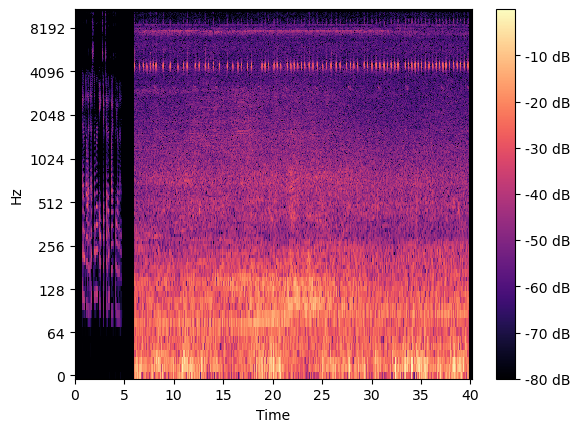

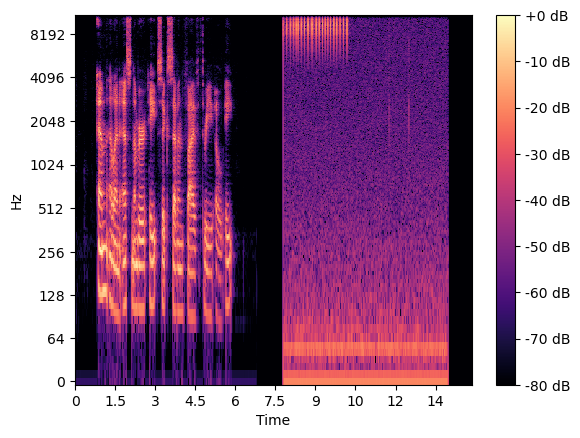

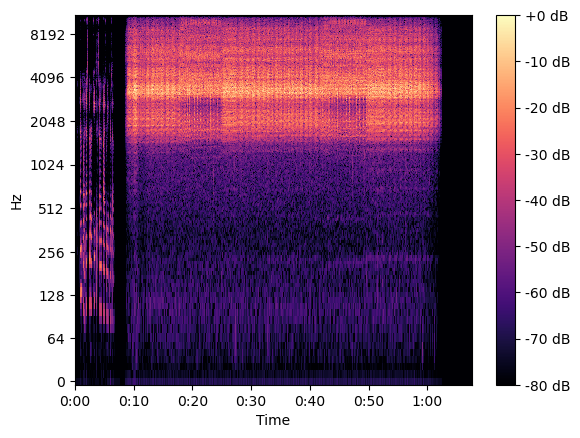

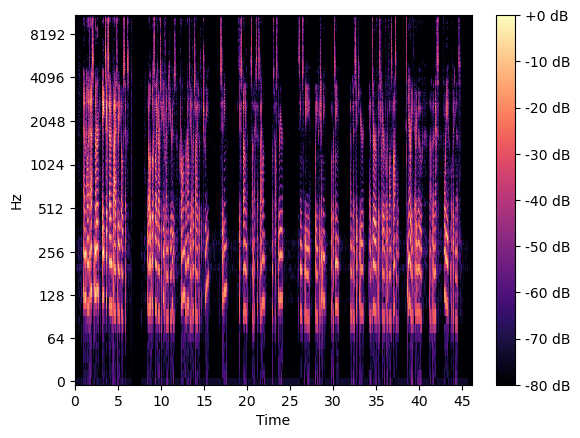

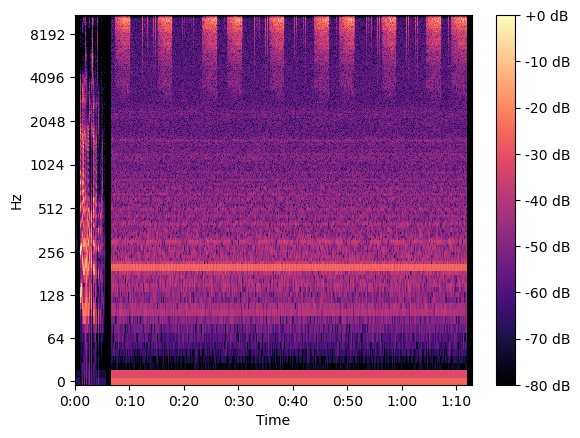

In [102]:
hop_length = 1024
n_fft = 2048
folder_path = 'FauxRecordings'
for file in os.listdir(folder_path):
    song, sr = librosa.load(os.path.join(folder_path,file))
    DB = librosa.amplitude_to_db(abs(librosa.stft(song)), ref=np.max)
    librosa.display.specshow(DB, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()


## Spectrograms of files AFTER cutting catalog number and length to 20s

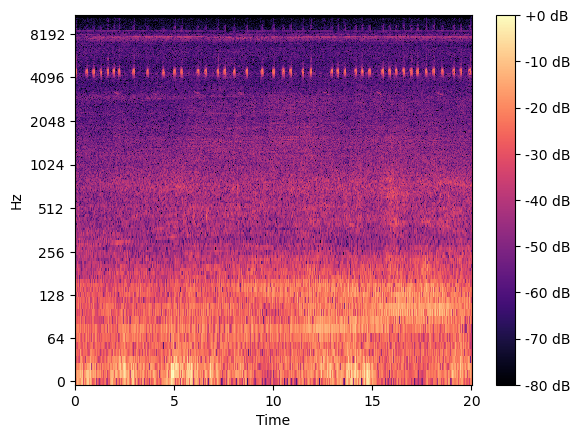

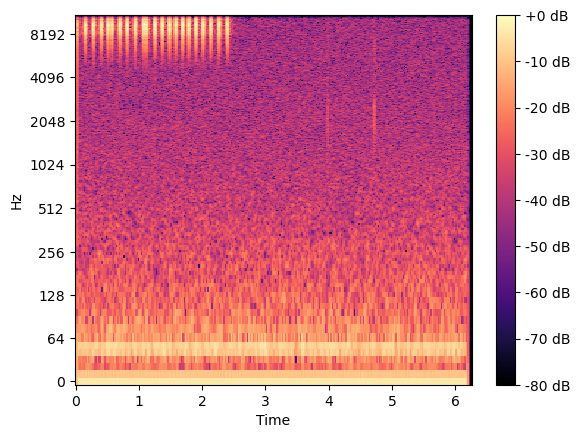

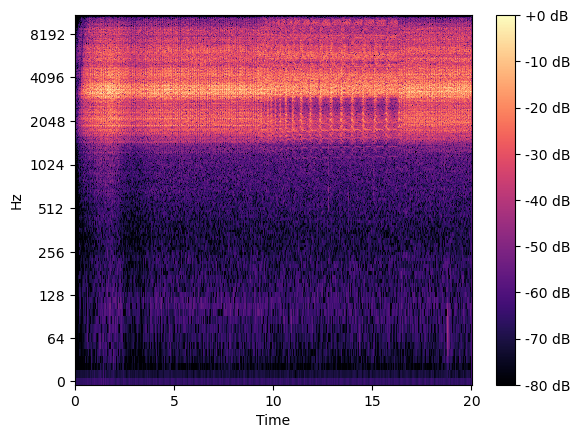

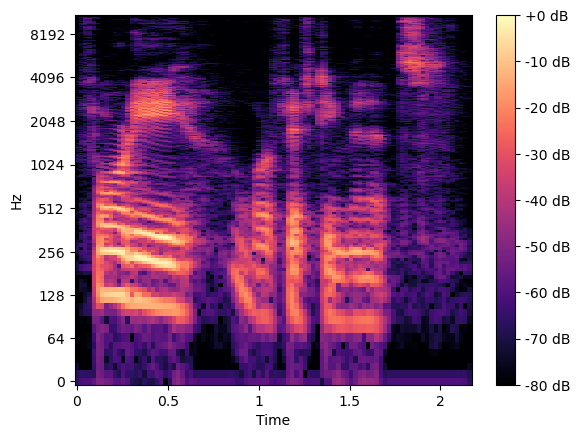

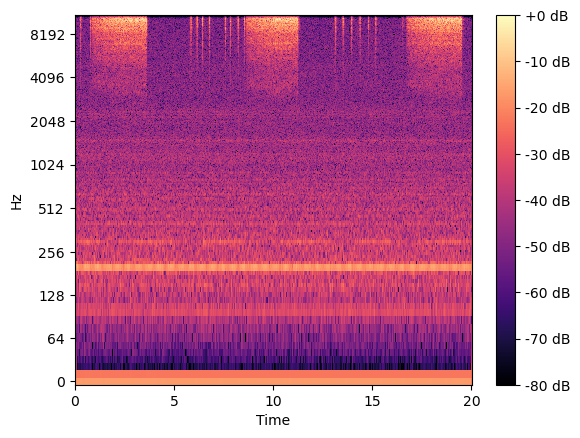

In [107]:
hop_length = 1024
n_fft = 2048
folder_path = 'FauxRecordings_cut'
for file in os.listdir(folder_path):
    song, sr = librosa.load(os.path.join(folder_path,file))
    DB = librosa.amplitude_to_db(abs(librosa.stft(song)), ref=np.max)
    librosa.display.specshow(DB, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()

## Removing audio files that have talking (many of the files we recieved from the Macaulay Library of Natural Sounds had human voice)

In [ ]:
import torch
from IPython.display import Audio
from pprint import pprint

torch.set_num_threads(1)
SAMPLING_RATE = 16000

model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True,
                              onnx=False)

(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

wav = read_audio('E://Chirp_Files/117596.wav', sampling_rate=SAMPLING_RATE)
# get speech timestamps from full audio file
speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=SAMPLING_RATE)
pprint(speech_timestamps)


In [ ]:
import sys
sys.path.append('E://Chirp_Files')

In [ ]:
import os
# assign directory
directory = 'E://Chirp_Files'
no_voice_files=[]
voice_files=[]

# iterate over files in
# that directory
n = 0
m = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        n+=1
        m+=1
        wav = read_audio(f, sampling_rate=SAMPLING_RATE)
        speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=SAMPLING_RATE)
        if speech_timestamps == []:
            no_voice_files.append(f)
        else:
            voice_files.append(f)
        if n % 100 == 0:
            print(m)
            n = 0
            df = pd.DataFrame(voice_files)
            df.to_csv("voice_files.csv", header=False, index=False)
            df = pd.DataFrame(no_voice_files)
            df.to_csv("no_voice_files.csv", header=False, index=False)